In [1]:
import pandas as pd
import numpy as np 


In [2]:
df = pd.read_csv("3dprinting.csv")


In [3]:
df

,Title,cleaned_desc
0,additive manufacturing ancillary equipment,archisketch interior scanner capable materiali...
1,additive manufacturing ancillary equipment,whiteclouds dcloud software platform allow com...
2,additive manufacturing ancillary equipment,mission critical electronics inc represents pl...
3,additive manufacturing ancillary equipment,xantrex technology engages development manufac...
4,additive manufacturing ancillary equipment,strategy create unique range sensors solve app...
...,...,...
5685,additive manufacturing software solutions,industrial grade printing company providing fu...
5686,additive manufacturing software solutions,roland dga corporation u based marketing distr...
5687,additive manufacturing software solutions,sintratec switzerland leading manufacturer pri...
5688,additive manufacturing software solutions,modio anybody create fun models creations easi...


In [4]:
df["Title"].value_counts()

additive manufucturing services                        2768
machining, finish and assembly services                1722
additive manufacturing (3d printing) equipment          528
additive manufacturing software solutions               415
additive manufacturing marketplaces and aggregators     129
additive manufacturing ancillary equipment              128
Name: Title, dtype: int64

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [6]:
X = vectorizer.fit_transform(df.cleaned_desc).toarray()
print(vectorizer.get_feature_names())

['aalborg', 'aarhus', 'aart', 'ab', 'abaad', 'abi', 'abilities', 'ability', 'ablation', 'able', 'abnormalities', 'abreast', 'abroad', 'abs', 'absolute', 'abu', 'academia', 'academic', 'accelerate', 'accelerated', 'accelerator', 'accelity', 'accentondesign', 'accept', 'acceptance', 'accepted', 'accepts', 'access', 'accessed', 'accessible', 'accessiblity', 'accessories', 'accessory', 'accolades', 'accommodate', 'accomodate', 'accompanying', 'accomplish', 'accomplished', 'accordance', 'according', 'account', 'accountability', 'accounting', 'accreditation', 'accredited', 'accudynamics', 'accumulate', 'accumulating', 'accuracy', 'accurate', 'accurately', 'accuron', 'achieve', 'achieved', 'achievement', 'achieving', 'achterkamp', 'acknowledgement', 'acm', 'acquire', 'acquired', 'acquires', 'acquiring', 'acquisition', 'acquisitions', 'acre', 'acron', 'acronym', 'across', 'act', 'actarus', 'acting', 'action', 'actionable', 'actions', 'activated', 'active', 'actively', 'activities', 'activity',

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
Labelencoder = LabelEncoder()

In [9]:
df["y"] = Labelencoder.fit_transform(df["Title"])
df


,Title,cleaned_desc,y
0,additive manufacturing ancillary equipment,archisketch interior scanner capable materiali...,1
1,additive manufacturing ancillary equipment,whiteclouds dcloud software platform allow com...,1
2,additive manufacturing ancillary equipment,mission critical electronics inc represents pl...,1
3,additive manufacturing ancillary equipment,xantrex technology engages development manufac...,1
4,additive manufacturing ancillary equipment,strategy create unique range sensors solve app...,1
...,...,...,...
5685,additive manufacturing software solutions,industrial grade printing company providing fu...,3
5686,additive manufacturing software solutions,roland dga corporation u based marketing distr...,3
5687,additive manufacturing software solutions,sintratec switzerland leading manufacturer pri...,3
5688,additive manufacturing software solutions,modio anybody create fun models creations easi...,3


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df.y, test_size=0.20, random_state=42)

In [11]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
y_train

2855    0
43      1
3567    4
3838    4
3944    4
       ..
3772    4
5191    5
5226    5
5390    5
860     4
Name: y, Length: 4552, dtype: int32

In [14]:
y_test

3435    4
5154    5
4209    4
3957    4
5471    3
       ..
3655    4
219     0
1869    5
1115    4
582     4
Name: y, Length: 1138, dtype: int32

In [15]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train) 

GaussianNB()

In [16]:
y_pred = classifier.predict(X_test)  

In [17]:
y_pred

array([4, 4, 5, ..., 5, 5, 3])

In [18]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [19]:
cm


array([[ 48,  12,   1,  26,  15,   6],
       [  4,   6,   2,   2,   6,   3],
       [  0,   1,  15,   2,   4,   2],
       [ 15,   7,   5,  33,   8,   6],
       [ 44,   9,  18,  30, 116, 349],
       [ 11,   4,   4,  12,  43, 269]], dtype=int64)

<AxesSubplot:>

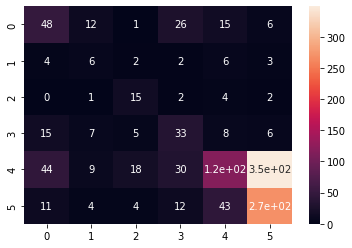

In [20]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.44      0.42       108
           1       0.15      0.26      0.19        23
           2       0.33      0.62      0.43        24
           3       0.31      0.45      0.37        74
           4       0.60      0.20      0.31       566
           5       0.42      0.78      0.55       343

    accuracy                           0.43      1138
   macro avg       0.37      0.46      0.38      1138
weighted avg       0.50      0.43      0.39      1138



In [22]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=42)  
classifier.fit(X_train, y_train)  

LogisticRegression(random_state=42)

In [23]:
y_pred = classifier.predict(X_test)  

In [24]:
y_pred

array([4, 4, 5, ..., 4, 4, 4])

In [25]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [26]:
cm

array([[ 44,   0,   1,  16,  38,   9],
       [  3,   0,   0,   5,  14,   1],
       [  1,   0,   4,   2,  16,   1],
       [ 22,   0,   0,  23,  27,   2],
       [ 14,   0,   0,   2, 438, 112],
       [  1,   0,   0,   1, 204, 137]], dtype=int64)

<AxesSubplot:>

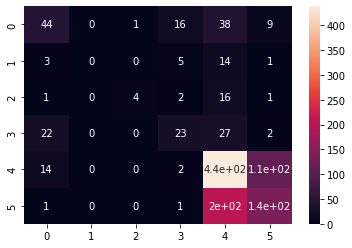

In [27]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.41      0.46       108
           1       0.00      0.00      0.00        23
           2       0.80      0.17      0.28        24
           3       0.47      0.31      0.37        74
           4       0.59      0.77      0.67       566
           5       0.52      0.40      0.45       343

    accuracy                           0.57      1138
   macro avg       0.48      0.34      0.37      1138
weighted avg       0.55      0.57      0.54      1138



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [30]:
y_pred= classifier.predict(X_test)  

In [31]:
y_pred

array([4, 4, 5, ..., 4, 5, 4])

In [32]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [33]:
cm

array([[ 37,   4,   1,  28,  27,  11],
       [  3,   2,   0,   7,  11,   0],
       [  1,   0,   8,   3,  11,   1],
       [ 22,   3,   3,  27,  15,   4],
       [ 22,   2,   1,   5, 399, 137],
       [  3,   0,   0,   1, 207, 132]], dtype=int64)

<AxesSubplot:>

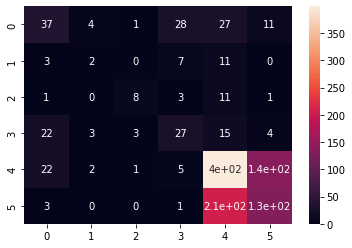

In [34]:
sns.heatmap(cm, annot=True)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.34      0.38       108
           1       0.18      0.09      0.12        23
           2       0.62      0.33      0.43        24
           3       0.38      0.36      0.37        74
           4       0.60      0.70      0.65       566
           5       0.46      0.38      0.42       343

    accuracy                           0.53      1138
   macro avg       0.44      0.37      0.39      1138
weighted avg       0.52      0.53      0.52      1138



In [36]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [37]:
y_pred= classifier.predict(X_test)  

In [38]:
y_pred

array([3, 4, 5, ..., 4, 4, 4])

In [39]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[ 54,   4,   1,  17,  28,   4],
       [  5,   9,   0,   2,   7,   0],
       [  2,   0,  10,   0,   8,   4],
       [ 21,   3,   4,  24,  20,   2],
       [ 28,   0,   1,   5, 397, 135],
       [  8,   0,   0,   2, 209, 124]], dtype=int64)

<AxesSubplot:>

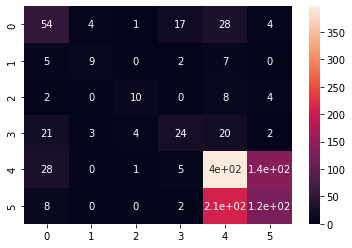

In [41]:
sns.heatmap(cm, annot=True)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.50      0.48       108
           1       0.56      0.39      0.46        23
           2       0.62      0.42      0.50        24
           3       0.48      0.32      0.39        74
           4       0.59      0.70      0.64       566
           5       0.46      0.36      0.41       343

    accuracy                           0.54      1138
   macro avg       0.53      0.45      0.48      1138
weighted avg       0.53      0.54      0.53      1138



In [43]:
from xgboost import XGBClassifier

In [44]:
classifier= XGBClassifier()

In [45]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [46]:
y_pred= classifier.predict(X_test)  

In [47]:
y_pred

array([4, 4, 5, ..., 4, 4, 4], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[ 43,   3,   1,  21,  27,  13],
       [  3,   2,   0,   6,   9,   3],
       [  2,   0,  12,   3,   5,   2],
       [ 23,   3,   3,  31,  11,   3],
       [ 22,   2,   0,   4, 435, 103],
       [  3,   0,   0,   1, 205, 134]], dtype=int64)

<AxesSubplot:>

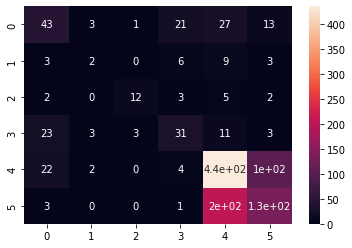

In [50]:
sns.heatmap(cm, annot=True)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.40      0.42       108
           1       0.20      0.09      0.12        23
           2       0.75      0.50      0.60        24
           3       0.47      0.42      0.44        74
           4       0.63      0.77      0.69       566
           5       0.52      0.39      0.45       343

    accuracy                           0.58      1138
   macro avg       0.50      0.43      0.45      1138
weighted avg       0.56      0.58      0.56      1138



In [52]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [53]:
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 70}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 60}
params_4 = {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 80}
params_5 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 40}

In [54]:
model_1 = DecisionTreeClassifier(**params_1)
model_2 = DecisionTreeClassifier(**params_2)
model_3 = DecisionTreeClassifier(**params_3)
model_4 = DecisionTreeClassifier(**params_4)
model_5 = DecisionTreeClassifier(**params_5)
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train, y_train)
model_5.fit(X_train, y_train)
# Prediction sets
preds_1 = model_1.predict(X_test)
preds_2 = model_3.predict(X_test)
preds_3 = model_3.predict(X_test)
preds_4 = model_4.predict(X_test)
preds_5 = model_5.predict(X_test)
print(f'Accuracy on Model 1: {round(accuracy_score(y_test, preds_1), 3)}')
print(f'Accuracy on Model 2: {round(accuracy_score(y_test, preds_2), 3)}')
print(f'Accuracy on Model 3: {round(accuracy_score(y_test, preds_3), 3)}')
print(f'Accuracy on Model 4: {round(accuracy_score(y_test, preds_4), 3)}')
print(f'Accuracy on Model 5: {round(accuracy_score(y_test, preds_5), 3)}')

Accuracy on Model 1: 0.548
Accuracy on Model 2: 0.549
Accuracy on Model 3: 0.549
Accuracy on Model 4: 0.544
Accuracy on Model 5: 0.538


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
gs = GridSearchCV(knn_clf,param_grid,cv=10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [57]:
gs.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20},
 {'n_neighbors': 21},
 {'n_neighbors': 22},
 {'n_neighbors': 23},
 {'n_neighbors': 24},
 {'n_neighbors': 25},
 {'n_neighbors': 26},
 {'n_neighbors': 27},
 {'n_neighbors': 28},
 {'n_neighbors': 29},
 {'n_neighbors': 30}]

In [58]:
gs.best_params_

{'n_neighbors': 2}

In [59]:
gs.cv_results_['mean_test_score']

array([0.56107914, 0.58743686, 0.55426595, 0.57974889, 0.56635338,
       0.58656111, 0.57777376, 0.58062753, 0.58502265, 0.58062849,
       0.57535762, 0.57513688, 0.57227877, 0.57008001, 0.56480721,
       0.56436524, 0.56480528, 0.56568392, 0.5656791 , 0.56172932,
       0.56282822, 0.56502892, 0.56634808, 0.56107721, 0.56217226,
       0.5597566 , 0.55778051, 0.55689946, 0.5566792 , 0.55558174])

In [60]:
print(gs.score(X_test,y_test))

0.5852372583479789


In [61]:
classifier = RandomForestClassifier(n_estimators=50)

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [64]:
samples = 8  # number of random samples 
randomCV = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=samples,cv=3)

In [65]:
randomCV.fit(X_train, y_train)
print(randomCV.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
randomCV.cv_results_['mean_test_score']

In [ ]:
print(randomCV.score(X_test,y_test))

In [69]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',  'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100] 
param_distributions = dict(loss=loss, penalty=penalty, alpha=alpha, learning_rate=learning_rate, class_weight=class_weight, eta0=eta0) 

In [70]:
from sklearn.linear_model import SGDClassifier 

In [ ]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000) 
random = RandomizedSearchCV(estimator=sgd, 
param_distributions=param_distributions, 
scoring='roc_auc', 
verbose=1, n_jobs=-1, 
n_iter=1000) 
random_result = random.fit(X_train, y_train) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_) 

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
